In [1]:
from vivarium import InteractiveContext

In [28]:
pip install seaborn

Looking in indexes: https://pypi.org/simple, https://artifactory.ihme.washington.edu/artifactory/api/pypi/pypi-shared/simple
     |████████████████████████████████| 215 kB 18.2 MB/s eta 0:00:01
     |████████████████████████████████| 12.4 MB 45.1 MB/s eta 0:00:01
  Using cached cycler-0.10.0-py2.py3-none-any.whl (6.5 kB)
     |████████████████████████████████| 67 kB 1.1 MB/s  eta 0:00:01
     |████████████████████████████████| 88 kB 872 kB/s  eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [36]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

* go on the zenon repo
* run 'make_specs'
* Then you go into ipython/jupyter notebook
* import InteractiveContext
* p = path to specifications yaml file
* make simulation by running:
* sim = InteractiveContext(p)
* this takes a couple minutes to build

To get sim outputs:
* you need to call sim.finalize

After running, we care about
sim.get_population() -> returns DataFrame of state table (state of every simulant in the sim)
sim.list_values() -> returns list of all values stored in pipelines
sim.get_value() (of the pipeline name (index))
ex: sim.get_value(pipeline_name)(pop.index)

ex: pop = sim.get_population()

In [9]:
sim.list_values()

['metrics',
 'cause_specific_mortality_rate',
 'mortality_rate',
 'acute_myocardial_infarction.incidence_rate.paf',
 'post_myocardial_infarction_to_acute_myocardial_infarction.transition_rate.paf',
 'acute_ischemic_stroke.incidence_rate.paf',
 'post_ischemic_stroke_to_acute_ischemic_stroke.transition_rate.paf',
 'acute_myocardial_infarction.incidence_rate',
 'acute_myocardial_infarction.dwell_time',
 'acute_myocardial_infarction.disability_weight',
 'disability_weight',
 'acute_myocardial_infarction.excess_mortality_rate',
 'acute_myocardial_infarction.excess_mortality_rate.population_attributable_fraction',
 'post_myocardial_infarction.dwell_time',
 'post_myocardial_infarction.disability_weight',
 'post_myocardial_infarction.excess_mortality_rate',
 'post_myocardial_infarction.excess_mortality_rate.population_attributable_fraction',
 'post_myocardial_infarction_to_acute_myocardial_infarction.transition_rate',
 'acute_ischemic_stroke.incidence_rate',
 'acute_ischemic_stroke.dwell_time'

In [6]:
p = f'/ihme/homes/santonis/notebooks/sanofi_zenon/brazil.yaml'
sim = InteractiveContext(p)
pop = sim.get_population()


2020-04-28 09:54:26.665 | DEBUG    | vivarium.framework.values:register_value_modifier:373 - Registering metrics.1.population_manager.metrics as modifier to metrics
2020-04-28 09:54:26.667 | DEBUG    | vivarium.framework.artifact.manager:_load_artifact:66 - Running simulation from artifact located at /share/costeffectiveness/artifacts/vivarium_csu_zenon/brazil.hdf.
2020-04-28 09:54:26.668 | DEBUG    | vivarium.framework.artifact.manager:_load_artifact:67 - Artifact base filter terms are ['draw == 0', "location == 'Brazil' | location == 'Global'"].
2020-04-28 09:54:26.669 | DEBUG    | vivarium.framework.artifact.manager:_load_artifact:68 - Artifact additional filter terms are None.
2020-04-28 09:54:28.838 | DEBUG    | vivarium.framework.values:_register_value_producer:323 - Registering value pipeline cause_specific_mortality_rate
2020-04-28 09:54:28.839 | DEBUG    | vivarium.framework.values:_register_value_producer:323 - Registering value pipeline mortality_rate
2020-04-28 09:54:32.220

2020-04-28 09:54:41.955 | DEBUG    | vivarium.framework.values:_register_value_producer:323 - Registering value pipeline post_ischemic_stroke.dwell_time
2020-04-28 09:54:42.586 | DEBUG    | vivarium.framework.values:_register_value_producer:323 - Registering value pipeline post_ischemic_stroke.disability_weight
2020-04-28 09:54:42.588 | DEBUG    | vivarium.framework.values:register_value_modifier:373 - Registering disability_weight.4.post_ischemic_stroke.disability_weight as modifier to disability_weight
2020-04-28 09:54:43.071 | DEBUG    | vivarium.framework.values:_register_value_producer:323 - Registering value pipeline post_ischemic_stroke.excess_mortality_rate
2020-04-28 09:54:43.072 | DEBUG    | vivarium.framework.values:_register_value_producer:323 - Registering value pipeline post_ischemic_stroke.excess_mortality_rate.population_attributable_fraction
2020-04-28 09:54:43.073 | DEBUG    | vivarium.framework.values:register_value_modifier:373 - Registering mortality_rate.4.state.p

KeyboardInterrupt: 

In [11]:
treat_date = pop[['follow_up_date']]

In [16]:
len(treat_date[treat_date.follow_up_date.notnull()])

13822

In [20]:
len(pop[pop.follow_up_date.notnull()])

13822

In [42]:
pop.columns

Index(['tracked', 'had_adverse_event', 'previous_chronic_kidney_disease',
       'previous_diabetes_mellitus', 'previous_ischemic_stroke',
       'previous_ischemic_heart_disease', 'years_lived_with_disability',
       'years_of_life_lost', 'cause_of_death', 'entrance_time', 'location',
       'age', 'alive', 'sex', 'exit_time',
       'ldlc_treatment_adherence_propensity', 'ischemic_stroke',
       'post_ischemic_stroke_event_count', 'post_ischemic_stroke_event_time',
       'acute_ischemic_stroke_event_time', 'acute_ischemic_stroke_event_count',
       'susceptible_to_ischemic_stroke_event_time',
       'susceptible_to_ischemic_stroke_event_count', 'ischemic_heart_disease',
       'post_myocardial_infarction_event_time',
       'post_myocardial_infarction_event_count',
       'acute_myocardial_infarction_event_count',
       'acute_myocardial_infarction_event_time',
       'susceptible_to_ischemic_heart_disease_event_count',
       'susceptible_to_ischemic_heart_disease_event_time',


In [15]:
locations = ['brazil', 'china', 'italy', 'france', 'russian_federation', 'spain']
# locations = ['brazil']

In [16]:
def get_init_data(locations):
    all_countries = pd.DataFrame([])
    for location in locations:
        p = f'/ihme/homes/santonis/notebooks/sanofi_zenon/{location}.yaml'
        sim = InteractiveContext(p)
        pop = sim.get_population()
        df = pop[['ischemic_heart_disease', 'ischemic_stroke', 'ldlc_treatment_category', 'age']] 
        df['follow_up_visits'] = len(pop[pop.follow_up_date.notnull()])
        df['ldl_c'] = sim.get_value('high_ldl_cholesterol.exposure')(pop.index)
        df['fpg'] = sim.get_value('high_fasting_plasma_glucose_continuous.exposure')(pop.index)
        df['sbp'] = sim.get_value('high_systolic_blood_pressure.exposure')(pop.index)
        df['ikf'] = sim.get_value('impaired_kidney_function.exposure')(pop.index)
        df['adherent'] = sim.get_value('ldlc_treatment_adherence')(pop.index)
        df['location'] = f'{location}'
        all_countries = all_countries.append(df)
    return all_countries

In [21]:
# def get_init_data(locations):
#     all_countries = pd.DataFrame([])
#     for location in locations:
#         p = f'/ihme/homes/santonis/notebooks/sanofi_zenon/{location}.yaml'
#         sim = InteractiveContext(p)
#         pop = sim.get_population()
#         df['follow_up_visits'] = len(pop[pop.follow_up_date.notnull()])
#         df['location'] = f'{location}'
#         all_countries = all_countries.append(df)
#     return all_countries

In [17]:
df = get_init_data(locations)

2020-04-28 10:09:11.625 | DEBUG    | vivarium.framework.values:register_value_modifier:373 - Registering metrics.1.population_manager.metrics as modifier to metrics
2020-04-28 10:09:16.917 | DEBUG    | vivarium.framework.artifact.manager:_load_artifact:66 - Running simulation from artifact located at /share/costeffectiveness/artifacts/vivarium_csu_zenon/brazil.hdf.
2020-04-28 10:09:16.919 | DEBUG    | vivarium.framework.artifact.manager:_load_artifact:67 - Artifact base filter terms are ['draw == 0', "location == 'Brazil' | location == 'Global'"].
2020-04-28 10:09:16.921 | DEBUG    | vivarium.framework.artifact.manager:_load_artifact:68 - Artifact additional filter terms are None.
2020-04-28 10:09:17.772 | DEBUG    | vivarium.framework.values:_register_value_producer:323 - Registering value pipeline cause_specific_mortality_rate
2020-04-28 10:09:17.773 | DEBUG    | vivarium.framework.values:_register_value_producer:323 - Registering value pipeline mortality_rate
2020-04-28 10:09:18.640

2020-04-28 10:09:25.242 | DEBUG    | vivarium.framework.values:_register_value_producer:323 - Registering value pipeline post_ischemic_stroke.dwell_time
2020-04-28 10:09:25.632 | DEBUG    | vivarium.framework.values:_register_value_producer:323 - Registering value pipeline post_ischemic_stroke.disability_weight
2020-04-28 10:09:25.634 | DEBUG    | vivarium.framework.values:register_value_modifier:373 - Registering disability_weight.4.post_ischemic_stroke.disability_weight as modifier to disability_weight
2020-04-28 10:09:26.037 | DEBUG    | vivarium.framework.values:_register_value_producer:323 - Registering value pipeline post_ischemic_stroke.excess_mortality_rate
2020-04-28 10:09:26.039 | DEBUG    | vivarium.framework.values:_register_value_producer:323 - Registering value pipeline post_ischemic_stroke.excess_mortality_rate.population_attributable_fraction
2020-04-28 10:09:26.040 | DEBUG    | vivarium.framework.values:register_value_modifier:373 - Registering mortality_rate.4.state.p

2020-04-28 10:09:44.949 | DEBUG    | vivarium.framework.values:register_value_modifier:373 - Registering post_ischemic_stroke_to_acute_ischemic_stroke.transition_rate.1.risk_effect.risk_factor.high_ldl_cholesterol.sequela.post_ischemic_stroke_to_acute_ischemic_stroke.transition_rate.adjust_target as modifier to post_ischemic_stroke_to_acute_ischemic_stroke.transition_rate
2020-04-28 10:09:44.950 | DEBUG    | vivarium.framework.values:_register_value_producer:323 - Registering value pipeline high_systolic_blood_pressure.propensity
2020-04-28 10:09:44.951 | DEBUG    | vivarium.framework.values:_register_value_producer:323 - Registering value pipeline high_systolic_blood_pressure.exposure
/share/code/santonis/miniconda/envs/vivarium_csu_zenon/lib/python3.6/site-packages/risk_distributions/risk_distributions.py:415: RuntimeWarning: invalid value encountered in double_scalars
  var_guess = scale ** 2 * special.gamma(1 + 2 / shape) - mean_guess ** 2
2020-04-28 10:10:03.530 | DEBUG    | vivar

2020-04-28 10:10:23.952 | DEBUG    | vivarium.framework.values:_register_value_producer:323 - Registering value pipeline utilization_rate
2020-04-28 10:10:23.978 | DEBUG    | vivarium.framework.values:_register_value_producer:323 - Registering value pipeline metrics
/share/code/santonis/miniconda/envs/vivarium_csu_zenon/lib/python3.6/site-packages/vivarium_public_health/population/data_transformations.py:165: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  pop_data = pd.concat([lower_bin, pop_data, upper_bin]).reset_index()
/share/code/santonis/miniconda/envs/vivarium_csu_zenon/lib/python3.6/site-packages/scipy/stats/_multivariate.py:660: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  out = random_state.multivariate_normal(mean, cov, size)
/share/code/sa

2020-04-28 10:12:46.881 | DEBUG    | vivarium.framework.values:register_value_modifier:373 - Registering mortality_rate.1.state.acute_myocardial_infarction.adjust_mortality_rate as modifier to mortality_rate
2020-04-28 10:12:46.882 | DEBUG    | vivarium.framework.values:register_value_modifier:373 - Registering metrics.5.state.post_myocardial_infarction.metrics as modifier to metrics
2020-04-28 10:12:47.294 | DEBUG    | vivarium.framework.values:_register_value_producer:323 - Registering value pipeline post_myocardial_infarction.dwell_time
2020-04-28 10:12:47.934 | DEBUG    | vivarium.framework.values:_register_value_producer:323 - Registering value pipeline post_myocardial_infarction.disability_weight
2020-04-28 10:12:47.935 | DEBUG    | vivarium.framework.values:register_value_modifier:373 - Registering disability_weight.2.post_myocardial_infarction.disability_weight as modifier to disability_weight
2020-04-28 10:12:48.579 | DEBUG    | vivarium.framework.values:_register_value_produc

2020-04-28 10:12:59.185 | DEBUG    | vivarium.framework.values:_register_value_producer:323 - Registering value pipeline moderate_diabetes_mellitus_to_diabetes_mellitus.transition_rate.paf
2020-04-28 10:12:59.187 | DEBUG    | vivarium.framework.values:register_value_modifier:373 - Registering metrics.14.state.severe_diabetes_mellitus.metrics as modifier to metrics
2020-04-28 10:12:59.677 | DEBUG    | vivarium.framework.values:_register_value_producer:323 - Registering value pipeline severe_diabetes_mellitus.dwell_time
2020-04-28 10:13:00.122 | DEBUG    | vivarium.framework.values:_register_value_producer:323 - Registering value pipeline severe_diabetes_mellitus.disability_weight
2020-04-28 10:13:00.124 | DEBUG    | vivarium.framework.values:register_value_modifier:373 - Registering disability_weight.6.severe_diabetes_mellitus.disability_weight as modifier to disability_weight
2020-04-28 10:13:03.045 | DEBUG    | vivarium.framework.values:_register_value_producer:323 - Registering value

2020-04-28 10:14:17.390 | DEBUG    | vivarium.framework.values:register_value_modifier:373 - Registering post_myocardial_infarction_to_acute_myocardial_infarction.transition_rate.3.risk_effect.risk_factor.high_fasting_plasma_glucose_continuous.sequela.post_myocardial_infarction_to_acute_myocardial_infarction.transition_rate.adjust_target as modifier to post_myocardial_infarction_to_acute_myocardial_infarction.transition_rate
2020-04-28 10:14:17.615 | DEBUG    | vivarium.framework.values:register_value_modifier:373 - Registering post_ischemic_stroke_to_acute_ischemic_stroke.transition_rate.3.risk_effect.risk_factor.high_fasting_plasma_glucose_continuous.sequela.post_ischemic_stroke_to_acute_ischemic_stroke.transition_rate.adjust_target as modifier to post_ischemic_stroke_to_acute_ischemic_stroke.transition_rate
2020-04-28 10:14:17.620 | DEBUG    | vivarium.framework.values:_register_value_producer:323 - Registering value pipeline impaired_kidney_function.propensity
2020-04-28 10:14:17.6

/share/code/santonis/miniconda/envs/vivarium_csu_zenon/lib/python3.6/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]
/share/code/santonis/miniconda/envs/vivarium_csu_zenon/lib/python3.6/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
2020-04-28 10:16:47.112 | DEBUG    | vivarium.framework.values:register_value_modifier:373 - Registering metrics.1.population_manager.metrics as modifier to metrics
2020-04-28 10:16:47.142 | DEBUG    | vivarium.framewor

2020-04-28 10:17:00.644 | DEBUG    | vivarium.framework.values:_register_value_producer:323 - Registering value pipeline acute_ischemic_stroke.excess_mortality_rate
2020-04-28 10:17:00.646 | DEBUG    | vivarium.framework.values:_register_value_producer:323 - Registering value pipeline acute_ischemic_stroke.excess_mortality_rate.population_attributable_fraction
2020-04-28 10:17:00.647 | DEBUG    | vivarium.framework.values:register_value_modifier:373 - Registering mortality_rate.3.state.acute_ischemic_stroke.adjust_mortality_rate as modifier to mortality_rate
2020-04-28 10:17:00.648 | DEBUG    | vivarium.framework.values:register_value_modifier:373 - Registering metrics.9.state.post_ischemic_stroke.metrics as modifier to metrics
2020-04-28 10:17:01.073 | DEBUG    | vivarium.framework.values:_register_value_producer:323 - Registering value pipeline post_ischemic_stroke.dwell_time
2020-04-28 10:17:01.473 | DEBUG    | vivarium.framework.values:_register_value_producer:323 - Registering val

2020-04-28 10:17:33.905 | DEBUG    | vivarium.framework.values:register_value_modifier:373 - Registering acute_myocardial_infarction.incidence_rate.1.risk_effect.risk_factor.high_ldl_cholesterol.sequela.acute_myocardial_infarction.incidence_rate.adjust_target as modifier to acute_myocardial_infarction.incidence_rate
2020-04-28 10:17:34.123 | DEBUG    | vivarium.framework.values:register_value_modifier:373 - Registering acute_ischemic_stroke.incidence_rate.1.risk_effect.risk_factor.high_ldl_cholesterol.sequela.acute_ischemic_stroke.incidence_rate.adjust_target as modifier to acute_ischemic_stroke.incidence_rate
2020-04-28 10:17:34.349 | DEBUG    | vivarium.framework.values:register_value_modifier:373 - Registering post_myocardial_infarction_to_acute_myocardial_infarction.transition_rate.1.risk_effect.risk_factor.high_ldl_cholesterol.sequela.post_myocardial_infarction_to_acute_myocardial_infarction.transition_rate.adjust_target as modifier to post_myocardial_infarction_to_acute_myocardia

2020-04-28 10:18:33.113 | DEBUG    | vivarium.framework.values:_register_value_producer:323 - Registering value pipeline disability_weight
2020-04-28 10:18:33.115 | DEBUG    | vivarium.framework.values:register_value_modifier:373 - Registering metrics.16.disability_observer.metrics as modifier to metrics
2020-04-28 10:18:33.230 | DEBUG    | vivarium.framework.values:register_value_modifier:373 - Registering metrics.17.disease_observer.ischemic_heart_disease.metrics as modifier to metrics
2020-04-28 10:18:33.341 | DEBUG    | vivarium.framework.values:register_value_modifier:373 - Registering metrics.18.disease_observer.ischemic_stroke.metrics as modifier to metrics
2020-04-28 10:18:33.450 | DEBUG    | vivarium.framework.values:register_value_modifier:373 - Registering metrics.19.disease_observer.diabetes_mellitus.metrics as modifier to metrics
2020-04-28 10:18:33.559 | DEBUG    | vivarium.framework.values:register_value_modifier:373 - Registering metrics.20.disease_observer.chronic_kidn

2020-04-28 10:20:56.509 | DEBUG    | vivarium.framework.values:register_value_modifier:373 - Registering cause_specific_mortality_rate.1.disease_model.ischemic_heart_disease.adjust_cause_specific_mortality_rate as modifier to cause_specific_mortality_rate
2020-04-28 10:20:56.513 | DEBUG    | vivarium.framework.values:register_value_modifier:373 - Registering metrics.2.disease_model.ischemic_heart_disease.metrics as modifier to metrics
2020-04-28 10:20:56.514 | DEBUG    | vivarium.framework.values:register_value_modifier:373 - Registering metrics.3.state.susceptible_to_ischemic_heart_disease.metrics as modifier to metrics
2020-04-28 10:20:57.271 | DEBUG    | vivarium.framework.values:_register_value_producer:323 - Registering value pipeline acute_myocardial_infarction.incidence_rate
2020-04-28 10:20:57.273 | DEBUG    | vivarium.framework.values:_register_value_producer:323 - Registering value pipeline acute_myocardial_infarction.incidence_rate.paf
2020-04-28 10:20:57.274 | DEBUG    | vi

2020-04-28 10:21:04.693 | DEBUG    | vivarium.framework.values:_register_value_producer:323 - Registering value pipeline diabetes_mellitus.incidence_rate
2020-04-28 10:21:04.695 | DEBUG    | vivarium.framework.values:_register_value_producer:323 - Registering value pipeline diabetes_mellitus.incidence_rate.paf
2020-04-28 10:21:04.696 | DEBUG    | vivarium.framework.values:register_value_modifier:373 - Registering metrics.12.state.diabetes_mellitus.metrics as modifier to metrics
2020-04-28 10:21:05.509 | DEBUG    | vivarium.framework.values:register_value_modifier:373 - Registering metrics.13.state.moderate_diabetes_mellitus.metrics as modifier to metrics
2020-04-28 10:21:05.919 | DEBUG    | vivarium.framework.values:_register_value_producer:323 - Registering value pipeline moderate_diabetes_mellitus.dwell_time
2020-04-28 10:21:06.362 | DEBUG    | vivarium.framework.values:_register_value_producer:323 - Registering value pipeline moderate_diabetes_mellitus.disability_weight
2020-04-28 1

2020-04-28 10:22:08.734 | DEBUG    | vivarium.framework.values:register_value_modifier:373 - Registering acute_ischemic_stroke.incidence_rate.2.risk_effect.risk_factor.high_systolic_blood_pressure.sequela.acute_ischemic_stroke.incidence_rate.adjust_target as modifier to acute_ischemic_stroke.incidence_rate
2020-04-28 10:22:08.980 | DEBUG    | vivarium.framework.values:register_value_modifier:373 - Registering post_myocardial_infarction_to_acute_myocardial_infarction.transition_rate.2.risk_effect.risk_factor.high_systolic_blood_pressure.sequela.post_myocardial_infarction_to_acute_myocardial_infarction.transition_rate.adjust_target as modifier to post_myocardial_infarction_to_acute_myocardial_infarction.transition_rate
2020-04-28 10:22:09.233 | DEBUG    | vivarium.framework.values:register_value_modifier:373 - Registering post_ischemic_stroke_to_acute_ischemic_stroke.transition_rate.2.risk_effect.risk_factor.high_systolic_blood_pressure.sequela.post_ischemic_stroke_to_acute_ischemic_stro

/share/code/santonis/miniconda/envs/vivarium_csu_zenon/lib/python3.6/site-packages/pandas/core/indexing.py:1494: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)
/share/code/santonis/miniconda/envs/vivarium_csu_zenon/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/share/code/santonis/miniconda/envs/vivarium_csu_zenon/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try

2020-04-28 10:24:58.498 | DEBUG    | vivarium.framework.values:_register_value_producer:323 - Registering value pipeline post_myocardial_infarction.excess_mortality_rate
2020-04-28 10:24:58.500 | DEBUG    | vivarium.framework.values:_register_value_producer:323 - Registering value pipeline post_myocardial_infarction.excess_mortality_rate.population_attributable_fraction
2020-04-28 10:24:58.501 | DEBUG    | vivarium.framework.values:register_value_modifier:373 - Registering mortality_rate.2.state.post_myocardial_infarction.adjust_mortality_rate as modifier to mortality_rate
2020-04-28 10:24:58.730 | DEBUG    | vivarium.framework.values:_register_value_producer:323 - Registering value pipeline post_myocardial_infarction_to_acute_myocardial_infarction.transition_rate
2020-04-28 10:24:58.732 | DEBUG    | vivarium.framework.values:_register_value_producer:323 - Registering value pipeline post_myocardial_infarction_to_acute_myocardial_infarction.transition_rate.paf
2020-04-28 10:24:59.141 | 

2020-04-28 10:25:09.852 | DEBUG    | vivarium.framework.values:_register_value_producer:323 - Registering value pipeline severe_diabetes_mellitus.excess_mortality_rate
2020-04-28 10:25:09.853 | DEBUG    | vivarium.framework.values:_register_value_producer:323 - Registering value pipeline severe_diabetes_mellitus.excess_mortality_rate.population_attributable_fraction
2020-04-28 10:25:09.854 | DEBUG    | vivarium.framework.values:register_value_modifier:373 - Registering mortality_rate.6.state.severe_diabetes_mellitus.adjust_mortality_rate as modifier to mortality_rate
2020-04-28 10:25:10.082 | DEBUG    | vivarium.framework.values:_register_value_producer:323 - Registering value pipeline severe_diabetes_mellitus_to_diabetes_mellitus.transition_rate
2020-04-28 10:25:10.084 | DEBUG    | vivarium.framework.values:_register_value_producer:323 - Registering value pipeline severe_diabetes_mellitus_to_diabetes_mellitus.transition_rate.paf
2020-04-28 10:25:12.413 | DEBUG    | vivarium.framework.

2020-04-28 10:26:26.428 | DEBUG    | vivarium.framework.values:register_value_modifier:373 - Registering post_ischemic_stroke_to_acute_ischemic_stroke.transition_rate.3.risk_effect.risk_factor.high_fasting_plasma_glucose_continuous.sequela.post_ischemic_stroke_to_acute_ischemic_stroke.transition_rate.adjust_target as modifier to post_ischemic_stroke_to_acute_ischemic_stroke.transition_rate
2020-04-28 10:26:26.429 | DEBUG    | vivarium.framework.values:_register_value_producer:323 - Registering value pipeline impaired_kidney_function.propensity
2020-04-28 10:26:26.430 | DEBUG    | vivarium.framework.values:_register_value_producer:323 - Registering value pipeline impaired_kidney_function.exposure
2020-04-28 10:26:36.200 | DEBUG    | vivarium.framework.values:_register_value_producer:323 - Registering value pipeline risk_factor.impaired_kidney_function.exposure_parameters
2020-04-28 10:26:38.881 | DEBUG    | vivarium.framework.values:register_value_modifier:373 - Registering acute_myocar

2020-04-28 10:28:56.053 | DEBUG    | vivarium.framework.values:register_value_modifier:373 - Registering metrics.1.population_manager.metrics as modifier to metrics
2020-04-28 10:28:56.093 | DEBUG    | vivarium.framework.artifact.manager:_load_artifact:66 - Running simulation from artifact located at /share/costeffectiveness/artifacts/vivarium_csu_zenon/spain.hdf.
2020-04-28 10:28:56.094 | DEBUG    | vivarium.framework.artifact.manager:_load_artifact:67 - Artifact base filter terms are ['draw == 0', "location == 'Spain' | location == 'Global'"].
2020-04-28 10:28:56.094 | DEBUG    | vivarium.framework.artifact.manager:_load_artifact:68 - Artifact additional filter terms are None.
2020-04-28 10:28:57.945 | DEBUG    | vivarium.framework.values:_register_value_producer:323 - Registering value pipeline cause_specific_mortality_rate
2020-04-28 10:28:57.947 | DEBUG    | vivarium.framework.values:_register_value_producer:323 - Registering value pipeline mortality_rate
2020-04-28 10:29:00.816 |

2020-04-28 10:29:09.668 | DEBUG    | vivarium.framework.values:_register_value_producer:323 - Registering value pipeline post_ischemic_stroke.dwell_time
2020-04-28 10:29:10.064 | DEBUG    | vivarium.framework.values:_register_value_producer:323 - Registering value pipeline post_ischemic_stroke.disability_weight
2020-04-28 10:29:10.065 | DEBUG    | vivarium.framework.values:register_value_modifier:373 - Registering disability_weight.4.post_ischemic_stroke.disability_weight as modifier to disability_weight
2020-04-28 10:29:10.711 | DEBUG    | vivarium.framework.values:_register_value_producer:323 - Registering value pipeline post_ischemic_stroke.excess_mortality_rate
2020-04-28 10:29:10.713 | DEBUG    | vivarium.framework.values:_register_value_producer:323 - Registering value pipeline post_ischemic_stroke.excess_mortality_rate.population_attributable_fraction
2020-04-28 10:29:10.714 | DEBUG    | vivarium.framework.values:register_value_modifier:373 - Registering mortality_rate.4.state.p

2020-04-28 10:29:48.060 | DEBUG    | vivarium.framework.values:register_value_modifier:373 - Registering post_ischemic_stroke_to_acute_ischemic_stroke.transition_rate.1.risk_effect.risk_factor.high_ldl_cholesterol.sequela.post_ischemic_stroke_to_acute_ischemic_stroke.transition_rate.adjust_target as modifier to post_ischemic_stroke_to_acute_ischemic_stroke.transition_rate
2020-04-28 10:29:48.061 | DEBUG    | vivarium.framework.values:_register_value_producer:323 - Registering value pipeline high_systolic_blood_pressure.propensity
2020-04-28 10:29:48.062 | DEBUG    | vivarium.framework.values:_register_value_producer:323 - Registering value pipeline high_systolic_blood_pressure.exposure
/share/code/santonis/miniconda/envs/vivarium_csu_zenon/lib/python3.6/site-packages/risk_distributions/risk_distributions.py:415: RuntimeWarning: overflow encountered in double_scalars
  var_guess = scale ** 2 * special.gamma(1 + 2 / shape) - mean_guess ** 2
/share/code/santonis/miniconda/envs/vivarium_cs

2020-04-28 10:30:49.914 | DEBUG    | vivarium.framework.values:_register_value_producer:323 - Registering value pipeline ldlc_treatment_effect
2020-04-28 10:30:49.916 | DEBUG    | vivarium.framework.values:register_value_modifier:373 - Registering high_ldl_cholesterol.exposure.1.ldlc_treatment_effect.adjust_exposure as modifier to high_ldl_cholesterol.exposure
2020-04-28 10:30:49.937 | DEBUG    | vivarium.framework.values:_register_value_producer:323 - Registering value pipeline ldlc_treatment_adherence
/ihme/homes/santonis/notebooks/sanofi_zenon/vivarium_csu_zenon-feature-v7.0_intervention/src/vivarium_csu_zenon/components/treatment/treatment_algorithm.py:172: PerformanceWarning: indexing past lexsort depth may impact performance.
  .loc[(location, scenario)]
2020-04-28 10:30:51.713 | DEBUG    | vivarium.framework.values:_register_value_producer:323 - Registering value pipeline utilization_rate
2020-04-28 10:30:51.739 | DEBUG    | vivarium.framework.values:_register_value_producer:323

In [25]:
df[['location', 'follow_up_visits']].drop_duplicates()

,location,follow_up_visits
0,brazil,13822
0,china,2158
0,italy,18716
0,france,12446
0,russian_federation,24030
0,spain,9839


## Investigate follow-up date values and create df count based on it
* number of follow-up dates that are not NaD

## Table 2 validation

In [6]:
table_2_df = pd.read_csv('/ihme/homes/santonis/notebooks/sanofi_zenon/prob_rx_given_high_ldlc.csv')
table_2_df['location'] = table_2_df.location.str.replace('russia', 'russian_federation')
table_2_df = table_2_df.rename(columns={'mean_value':'table_2_mean_value', 'sd_value':'table_2_sd_value'})

In [7]:
def get_table_2_validations(df, locations, table_2_df):    
    init_df = pd.DataFrame([])
    shared_cols = ['location']
    for location in locations:
        df_loop = df[(df.location == location)]

        df_loop['output_mean_value'] = len(df_loop[(df_loop.ldlc_treatment_category != 'none')]) / (len(df_loop[(df_loop.ldlc_treatment_category == 'none') & (df_loop.ldl_c>=5.0)]) + len(df_loop[(df_loop.ldlc_treatment_category != 'none')]))
        
        init_df = init_df.append(df_loop)
    init_df = init_df[['location','output_mean_value']]
    init_df = init_df.drop_duplicates()
    init_df['output_mean_value'] = init_df.output_mean_value.astype(float)
    init_df = pd.merge(init_df, table_2_df, left_on=shared_cols, right_on=shared_cols)
    init_df= init_df.round(2)
    return init_df



In [13]:
#with 100_000 sim
get_table_2_validations(df, locations, table_2_df)

/share/code/santonis/miniconda/envs/vivarium_csu_zenon/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


,location,output_mean_value,table_2_mean_value,table_2_sd_value
0,brazil,0.53,0.42,0.19
1,china,0.24,0.32,0.18
2,italy,0.72,0.53,0.21
3,france,0.45,0.50,0.12
4,russian_federation,0.79,0.39,0.28
5,spain,0.47,0.34,0.10


In [46]:
get_table_2_validations(df, locations, table_2_df)

/share/code/santonis/miniconda/envs/vivarium_csu_zenon/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


,location,output_mean_value,table_2_mean_value,table_2_sd_value
0,brazil,0.54,0.42,0.19
1,china,0.23,0.32,0.18
2,italy,0.73,0.53,0.21
3,france,0.45,0.50,0.12
4,spain,0.47,0.34,0.10


## Table 6 validation

In [14]:
table_6_df = pd.read_csv('/ihme/homes/santonis/notebooks/sanofi_zenon/current_rx.csv')
table_6_df['location'] = table_6_df.location.str.replace('russia', 'russian_federation')

table_6_df = table_6_df.rename(columns={'mean_value':'table_6_mean_value', 'sd_value':'table_6_sd_value'})

In [15]:
def get_table_6_validations(df, locations, table_6_df):    
    init_df = pd.DataFrame([])
    shared_cols = ['location', 'current_prescription']
    for location in locations:
        df_loop = df[(df.location == location)]

        df_loop['% on ezetimibe'] = len(df_loop[(df_loop.ldlc_treatment_category == 'ezetimibe')])/ len(df_loop[(df_loop.ldlc_treatment_category != 'none')])
        df_loop['% on fibrates'] = len(df_loop[df_loop.ldlc_treatment_category == 'fibrates']) / len(df_loop[(df_loop.ldlc_treatment_category != 'none')])
        df_loop['% on high potency statin'] = len(df_loop[(df_loop.ldlc_treatment_category == 'high_potency_statin_low_dose')]) / len(df_loop[(df_loop.ldlc_treatment_category != 'none')])
        df_loop['% on low potency statin'] = len(df_loop[(df_loop.ldlc_treatment_category.str.contains('low_potency_statin_'))]) / len(df_loop[(df_loop.ldlc_treatment_category != 'none')])
        init_df = init_df.append(df_loop)
   
    init_df = pd.melt(init_df, id_vars=['location'])
    init_df = init_df[(init_df.variable.str.contains('%'))]
    init_df = init_df.drop_duplicates()
    init_df = init_df.rename(columns={'variable':'current_prescription', 'value':'output_mean_value'})
    init_df['output_mean_value'] = init_df.output_mean_value.astype(float)
    init_df = pd.merge(init_df, table_6_df, left_on=shared_cols, right_on=shared_cols)
    init_df= init_df.round(2)
    return init_df

In [12]:
pct_high_statin = len(df[(df.ldlc_treatment_category == 'high_potency_statin_low_dose')]) / len(df[(df.ldlc_treatment_category != 'none')])


In [13]:
pct_high_statin

0.5127263827704356

In [16]:
#with 100_000 sim
get_table_6_validations(df, locations, table_6_df)


/share/code/santonis/miniconda/envs/vivarium_csu_zenon/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/share/code/santonis/miniconda/envs/vivarium_csu_zenon/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/share/code/santonis/miniconda/envs/vivarium_csu_zenon/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

,location,current_prescription,output_mean_value,table_6_mean_value,table_6_sd_value
0,brazil,% on ezetimibe,0.05,0.10,0.10
1,china,% on ezetimibe,0.02,0.00,0.01
2,italy,% on ezetimibe,0.03,0.10,0.10
3,france,% on ezetimibe,0.06,0.04,0.04
4,russian_federation,% on ezetimibe,0.00,0.00,0.00
5,spain,% on ezetimibe,0.11,0.10,0.09
6,brazil,% on fibrates,0.06,0.14,0.12
7,china,% on fibrates,0.09,0.09,0.05
8,italy,% on fibrates,0.01,0.01,0.00
9,france,% on fibrates,0.11,0.13,0.07


In [21]:
get_table_6_validations(df, locations, table_6_df)


/share/code/santonis/miniconda/envs/vivarium_csu_zenon/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/share/code/santonis/miniconda/envs/vivarium_csu_zenon/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/share/code/santonis/miniconda/envs/vivarium_csu_zenon/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

,location,current_prescription,output_mean_value,table_6_mean_value,table_6_sd_value
0,brazil,% on ezetimibe,0.05,0.10,0.10
1,china,% on ezetimibe,0.01,0.00,0.01
2,italy,% on ezetimibe,0.03,0.10,0.10
3,france,% on ezetimibe,0.07,0.04,0.04
4,spain,% on ezetimibe,0.10,0.10,0.09
5,brazil,% on fibrates,0.07,0.14,0.12
6,china,% on fibrates,0.09,0.09,0.05
7,italy,% on fibrates,0.00,0.01,0.00
8,france,% on fibrates,0.11,0.13,0.07
9,spain,% on fibrates,0.00,0.00,0.00


## Table 8 validation

In [17]:
table_8_doc = pd.read_csv('/ihme/homes/santonis/notebooks/sanofi_zenon/dist_therapy_type.csv')
table_8_doc['location'] = table_8_doc.location.str.replace('russia', 'russian_federation')
table_8_doc = table_8_doc.rename(columns={'mean_value':'table_8_mean', 'sd_value':'table_8_sd'})

In [18]:
def get_table_8_validations(df, locations, table_8_doc):    
    init_df = pd.DataFrame([])
    shared_cols = ['location', 'therapy_type']
    for location in locations:
        df_loop = df[(df.location == location)]

        df_loop['% on monotherapy'] = len(df_loop[(df_loop.ldlc_treatment_category.str.contains(r'^(?:(?!_multi).)*$')) & (df_loop.ldlc_treatment_category.str.contains(r'^(?:(?!_fdc).)*$')) & (df_loop.ldlc_treatment_category != 'none')]) / len(df_loop[(df_loop.ldlc_treatment_category != 'none')])
        df_loop['% on multi-drugs'] = len(df_loop[((df_loop.ldlc_treatment_category.str.contains('multi')) | (df_loop.ldlc_treatment_category.str.contains('fdc')))]) / len(df_loop[(df_loop.ldlc_treatment_category != 'none')])
#         df_loop['% on FDC if multi drug'] = len(df_loop[(df_loop.ldlc_treatment_category.str.contains('fdc'))]) / len(df_loop[(df_loop.ldlc_treatment_category.str.contains('multi')) | (df_loop.ldlc_treatment_category.str.contains('fdc'))])
        df_loop['% on FDC if multi drug'] = len(df_loop[(df_loop.ldlc_treatment_category.str.contains('fdc'))]) / len(df_loop[(df_loop.ldlc_treatment_category.str.contains('multi')) | (df_loop.ldlc_treatment_category.str.contains('fdc'))])

        init_df = init_df.append(df_loop)
    init_df = pd.melt(init_df, id_vars=['location'])
    init_df = init_df[(init_df.variable.str.contains('%'))]
    init_df = init_df.drop_duplicates()
    init_df = init_df.rename(columns={'variable':'therapy_type', 'value':'output_mean_value'})
    init_df['output_mean_value'] = init_df.output_mean_value.astype(float)
    init_df = pd.merge(init_df, table_8_doc, left_on=shared_cols, right_on=shared_cols)
    init_df= init_df.round(2)
    return init_df


In [19]:
#with 100_000 sim
get_table_8_validations(df, locations, table_8_doc)

/share/code/santonis/miniconda/envs/vivarium_csu_zenon/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/share/code/santonis/miniconda/envs/vivarium_csu_zenon/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/share/code/santonis/miniconda/envs/vivarium_csu_zenon/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexe

,location,therapy_type,output_mean_value,table_8_mean,table_8_sd
0,brazil,% on monotherapy,0.77,0.70,0.00
1,china,% on monotherapy,0.99,0.98,0.00
2,italy,% on monotherapy,0.81,0.78,0.02
3,france,% on monotherapy,0.88,0.85,0.00
4,russian_federation,% on monotherapy,0.97,0.96,0.08
5,spain,% on monotherapy,0.76,0.68,0.00
6,brazil,% on multi-drugs,0.23,0.30,0.20
7,china,% on multi-drugs,0.01,0.02,0.01
8,italy,% on multi-drugs,0.19,0.22,0.14
9,france,% on multi-drugs,0.12,0.15,0.10


In [24]:
get_table_8_validations(df, locations, table_8_doc)

/share/code/santonis/miniconda/envs/vivarium_csu_zenon/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/share/code/santonis/miniconda/envs/vivarium_csu_zenon/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/share/code/santonis/miniconda/envs/vivarium_csu_zenon/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

,location,therapy_type,output_mean_value,table_8_mean,table_8_sd
0,brazil,% on monotherapy,0.76,0.70,0.00
1,china,% on monotherapy,1.00,0.98,0.00
2,italy,% on monotherapy,0.81,0.78,0.02
3,france,% on monotherapy,0.88,0.85,0.00
4,russian_federation,% on monotherapy,0.97,0.96,0.08
5,spain,% on monotherapy,0.76,0.68,0.00
6,brazil,% on multi-drugs,0.24,0.30,0.20
7,china,% on multi-drugs,0.00,0.02,0.01
8,italy,% on multi-drugs,0.19,0.22,0.14
9,france,% on multi-drugs,0.12,0.15,0.10


## Table 4 -- Adherence

In [18]:
table_4_df = pd.read_csv('/ihme/homes/santonis/notebooks/sanofi_zenon/adherence_parameters.csv')
table_4_df = table_4_df.rename(columns={'mean_value':'table_4_mean', 'sd_value':'table_4_sd'})
table_4_df['location'] = table_4_df.location.str.replace('russia', 'russian_federation')


In [22]:
def get_table_4_validations(df, locations, table_4_df):    
    init_df = pd.DataFrame([])
    shared_cols = ['location', 'adherence_parameter']
    for location in locations:
        df_loop = df[(df.location == location)]
        
        df_loop['Adherence - one pill, no MI'] = len(df_loop[(df_loop.ldlc_treatment_category.str.contains(r'^(?:(?!_multi).)*$')) & 
                            (df_loop.ldlc_treatment_category != 'none') & (df_loop.ischemic_heart_disease == 'susceptible_to_ischemic_heart_disease') 
                            & (df_loop.ischemic_stroke == 'susceptible_to_ischemic_stroke') & (df_loop.adherent == True)]) / len(df_loop[(df_loop.ldlc_treatment_category.str.contains(r'^(?:(?!_multi).)*$') & 
                            (df_loop.ldlc_treatment_category != 'none') & (df_loop.ischemic_heart_disease == 'susceptible_to_ischemic_heart_disease') 
                            & (df_loop.ischemic_stroke == 'susceptible_to_ischemic_stroke'))])

        multi_pill_no_mi = len(df_loop[(df_loop.ldlc_treatment_category.str.contains('multi') 
                                & (df_loop.ldlc_treatment_category != 'none') 
                                & (df_loop.ischemic_heart_disease == 'susceptible_to_ischemic_heart_disease') 
                                & (df_loop.ischemic_stroke == 'susceptible_to_ischemic_stroke'))])
        if multi_pill_no_mi > 0:
            df_loop['Adherence - multi-pill, no MI'] = len(df_loop[(df_loop.ldlc_treatment_category.str.contains('multi') 
                                & (df_loop.ischemic_heart_disease == 'susceptible_to_ischemic_heart_disease') 
                                & (df_loop.ischemic_stroke == 'susceptible_to_ischemic_stroke') 
                                & (df_loop.adherent == True))]) / multi_pill_no_mi
        else:
            df_loop['Adherence - multi-pill, no MI'] = 0
            
        one_pill_mi = len(df_loop[(df_loop.ldlc_treatment_category.str.contains(r'^(?:(?!_multi).)*$')) & 
                            (df_loop.ldlc_treatment_category != 'none') & (df_loop.ischemic_heart_disease != 'susceptible_to_ischemic_heart_disease') & (df_loop.ischemic_stroke != 'susceptible_to_ischemic_stroke')])
        if one_pill_mi > 0:
            df_loop['Adherence after MI (one pill)'] = len(df_loop[(df_loop.ldlc_treatment_category.str.contains(r'^(?:(?!_multi).)*$')) & 
                            (df_loop.ldlc_treatment_category != 'none') & ((df_loop.ischemic_heart_disease != 'susceptible_to_ischemic_heart_disease') 
                            | (df_loop.ischemic_stroke != 'susceptible_to_ischemic_stroke'))
                            & (df_loop.adherent == True)]) / len(df_loop[(df_loop.ldlc_treatment_category.str.contains(r'^(?:(?!_multi).)*$')) & 
                            (df_loop.ldlc_treatment_category != 'none') & ((df_loop.ischemic_heart_disease != 'susceptible_to_ischemic_heart_disease') | (df_loop.ischemic_stroke != 'susceptible_to_ischemic_stroke'))])
        
        
        else:
            df_loop['Adherence after MI (one pill)'] = 0
            
        adherent_mi_mult_pill = df_loop[(df_loop.adherent == True) & (df_loop.ldlc_treatment_category.str.contains('multi')) 
                                        & ((df_loop.ischemic_heart_disease != 'susceptible_to_ischemic_heart_disease') 
                                        | (df_loop.ischemic_stroke != 'susceptible_to_ischemic_stroke'))]
        
        pop_multi_pill_mi = len(df_loop[(df_loop.ldlc_treatment_category.str.contains('multi')) 
                                        & ((df_loop.ischemic_heart_disease != 'susceptible_to_ischemic_heart_disease') 
                                        | (df_loop.ischemic_stroke != 'susceptible_to_ischemic_stroke'))])
        if pop_multi_pill_mi > 0.0:
#             df_loop['Adherence after MI (multi-pill)'] = len(df_loop[((df_loop.ldlc_treatment_category.str.contains('multi')) & (df_loop.ischemic_heart_disease != 'susceptible_to_ischemic_heart_disease')& (df_loop.adherent == True)) | ((df_loop.ischemic_stroke != 'susceptible_to_ischemic_stroke') & (df_loop.ldlc_treatment_category.str.contains('multi')) & (df_loop.adherent == True))]) 
            df_loop['Adherence after MI (multi-pill)'] = len(adherent_mi_mult_pill) / pop_multi_pill_mi
   
        else:
        
            df_loop['Adherence after MI (multi-pill)'] = 0.0
            
#         if pop_multi_pill_mi > 0.0:

#             df_loop['Adherence after MI (multi-pill) numerator'] = len(adherent_mi_mult_pill)

#         else:
#             df_loop['Adherence after MI (multi-pill) numerator'] = 0.0
        
#         if pop_multi_pill_mi > 0.0:

#             df_loop['Adherence after MI (multi-pill) denominator'] = pop_multi_pill_mi

#         else:
#             df_loop['Adherence after MI (multi-pill) denominator'] = 0.0
            
        init_df = init_df.append(df_loop)
    
    init_df = pd.melt(init_df, id_vars=['location'])
    init_df = init_df[(init_df.variable.str.contains('Adherence'))]
    init_df = init_df.drop_duplicates()
    init_df = init_df.rename(columns={'variable':'adherence_parameter', 'value':'output_mean_value'})
    init_df['output_mean_value'] = init_df.output_mean_value.astype(float)
    init_df = pd.merge(init_df, table_4_df, left_on=shared_cols, right_on=shared_cols, how='left')
    init_df= init_df.round(2)
    return init_df


In [41]:
table_4_valid = get_table_4_validations(df, locations, table_4_df)

/share/code/santonis/miniconda/envs/vivarium_csu_zenon/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
/share/code/santonis/miniconda/envs/vivarium_csu_zenon/lib/python3.6/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/share/code/santonis/miniconda/envs/vivarium_csu_zenon/lib/python3.6/site-packages/ipykernel_launcher.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice

In [54]:
table_4_valid

,location,adherence_parameter,output_mean_value,table_4_mean,table_4_sd,table_4_upper,table_4_lower
0,brazil,"Adherence - one pill, no MI",0.38,0.55,0.11,0.77,0.33
1,china,"Adherence - one pill, no MI",0.53,0.49,0.10,0.69,0.29
2,italy,"Adherence - one pill, no MI",0.42,0.43,0.09,0.61,0.25
3,france,"Adherence - one pill, no MI",0.73,0.66,0.14,0.94,0.38
4,russian_federation,"Adherence - one pill, no MI",0.31,0.38,0.08,0.54,0.22
5,spain,"Adherence - one pill, no MI",0.65,0.70,0.15,1.00,0.40
6,brazil,"Adherence - multi-pill, no MI",0.18,0.29,0.06,0.41,0.17
7,china,"Adherence - multi-pill, no MI",0.17,0.23,0.05,0.33,0.13
8,italy,"Adherence - multi-pill, no MI",0.16,0.17,0.04,0.25,0.09
9,france,"Adherence - multi-pill, no MI",0.41,0.40,0.09,0.58,0.22


In [44]:
test_df = pd.melt(table_4_valid, id_vars = ['location', 'adherence_parameter','table_4_sd'])


In [45]:
test_df

,location,adherence_parameter,table_4_sd,variable,value
0,brazil,"Adherence - one pill, no MI",0.11,output_mean_value,0.38
1,china,"Adherence - one pill, no MI",0.10,output_mean_value,0.53
2,italy,"Adherence - one pill, no MI",0.09,output_mean_value,0.42
3,france,"Adherence - one pill, no MI",0.14,output_mean_value,0.73
4,russian_federation,"Adherence - one pill, no MI",0.08,output_mean_value,0.31
5,spain,"Adherence - one pill, no MI",0.15,output_mean_value,0.65
6,brazil,"Adherence - multi-pill, no MI",0.06,output_mean_value,0.18
7,china,"Adherence - multi-pill, no MI",0.05,output_mean_value,0.17
8,italy,"Adherence - multi-pill, no MI",0.04,output_mean_value,0.16
9,france,"Adherence - multi-pill, no MI",0.09,output_mean_value,0.41


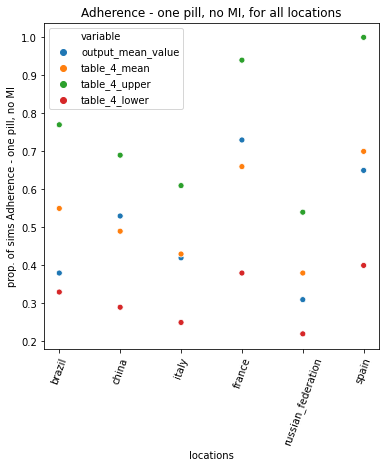

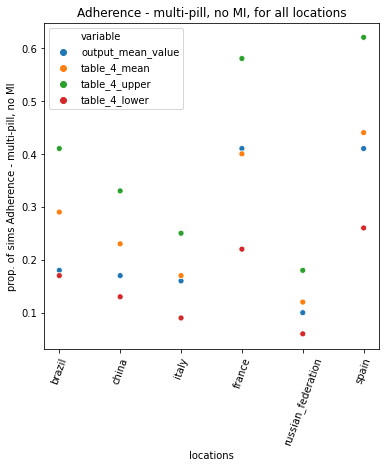

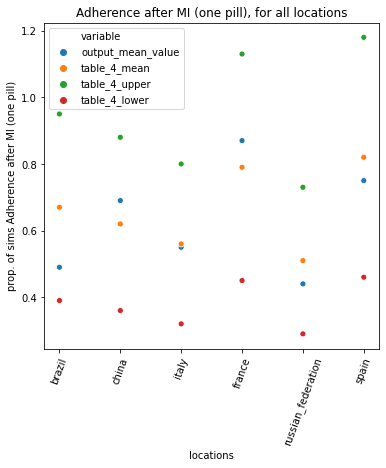

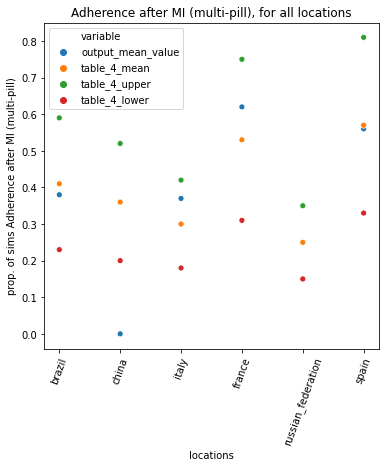

In [53]:
def adherence_scatterplot(table_4_valid, locations):
    parameters = ['Adherence - one pill, no MI', 'Adherence - multi-pill, no MI',
       'Adherence after MI (one pill)', 'Adherence after MI (multi-pill)']
    table_4_valid['table_4_upper'] = table_4_valid.apply(lambda row: (row['table_4_mean'] + (row['table_4_sd'])*2),axis=1)
    table_4_valid['table_4_lower'] = table_4_valid.apply(lambda row: (row['table_4_mean'] - (row['table_4_sd'])*2),axis=1)
    table_4_valid = table_4_valid.drop(columns=['table_4_sd'])
    df = pd.melt(table_4_valid, id_vars = ['location', 'adherence_parameter'])
    
    with PdfPages(f'adherence_values.pdf') as pdf:
            for parameter in parameters:
                f = plt.figure(figsize=(6, 6))
                df_plot = df[(df.adherence_parameter == parameter)]

                g = sns.scatterplot(x="location", y="value", hue="variable",
                             data=df_plot)
                g.set_title(f'{parameter}, for all locations')
                plt.xticks(rotation=70)
                g.set_xlabel('locations')
                g.set_ylabel(f'prop. of sims {parameter}')

                pdf.savefig(orientation = 'landscape', bbox_inches='tight')

adherence_scatterplot(table_4_valid, locations)

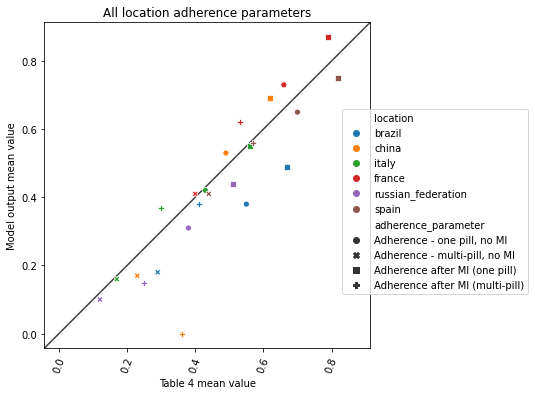

In [86]:
def adherence_scatterplot(table_4_valid, locations):
    parameters = ['Adherence - one pill, no MI', 'Adherence - multi-pill, no MI',
       'Adherence after MI (one pill)', 'Adherence after MI (multi-pill)']
#     table_4_valid['table_4_upper'] = table_4_valid.apply(lambda row: (row['table_4_mean'] + (row['table_4_sd'])*2),axis=1)
#     table_4_valid['table_4_lower'] = table_4_valid.apply(lambda row: (row['table_4_mean'] - (row['table_4_sd'])*2),axis=1)
#     table_4_valid = table_4_valid.drop(columns=['table_4_sd'])
    df = table_4_valid
    
    with PdfPages(f'adherence_values_2.pdf') as pdf:
#         for location in locations:
                f = plt.figure(figsize=(6, 6))
#                 df_plot = df[(df.location == location)]
                df_plot = df

                g = sns.scatterplot(x="table_4_mean", y="output_mean_value", hue='location', style='adherence_parameter',
                             data=df_plot)
                g.set_title(f'All location adherence parameters')
                plt.xticks(rotation=70)
                g.set_xlabel('Table 4 mean value')
                g.set_ylabel(f'Model output mean value')
                lims = [
                np.min([g.get_xlim(), g.get_ylim()]),  # min of both axes
                np.max([g.get_xlim(), g.get_ylim()]),  # max of both axes
                ]
                plt.legend(bbox_to_anchor=(1.5, .75), ncol=1)

                # now plot both limits against eachother
                g.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
                g.set_aspect('equal')
                g.set_xlim(lims)
                g.set_ylim(lims)
                pdf.savefig(orientation = 'landscape', bbox_inches='tight')

adherence_scatterplot(table_4_valid, locations)

In [38]:
table_4_valid.to_csv('table_4_validation.csv', index=False)

In [40]:
test_df = df[(df.ldlc_treatment_category.str.contains('multi') & (df.ldlc_treatment_category != 'none') 
                                & (df.ischemic_heart_disease == 'susceptible_to_ischemic_heart_disease') & (df.ischemic_stroke == 'susceptible_to_ischemic_stroke'))]


In [41]:
test_df['location'].unique()

array(['brazil', 'italy', 'france', 'russian_federation', 'spain'],
      dtype=object)